In [1]:
import os
import pandas as pd
import wordcloud
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
sns.set_palette("husl")
plt.figure(figsize=(16,9))
plt.style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')

<Figure size 1152x648 with 0 Axes>

In [2]:
vaxx=pd.read_csv("C:/Users/user/datasets/covidvaccine.csv")
vaxx

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338567,INOVIOLT #SpikeProtein,NaN,Former believer that innovative companies can ...,2020-07-17 15:06:56,2259.0,2304,20998,False,2021-12-03 21:38:44,This is how artificially mortality from covid ...,['CovidVaccine'],Twitter for iPad,False
338568,Independent voter🌺 #freespeech is dead,USA,Rational\nLogical Thinker\n#unity\ntrying to l...,2009-08-31 16:59:46,543.0,839,46712,False,2021-12-03 21:38:01,When ppl are willing to die to maintain their ...,"['CovidVaccine', 'COVID19', 'Italia', 'Italy']",Twitter for Android,False
338569,@OlePops,NaN,"The Man, The Myth, The Legend. Nah... It's jus...",2019-02-18 15:48:27,159.0,709,2469,False,2021-12-03 21:37:39,Italians walking in for their Vaxx.....\n#Covi...,['CovidVaccine'],Twitter Web App,False
338570,Epidemiologist 🇺🇸 and Patriot ❤️,NaN,"Epidemiologist, Educator, and Patriot 🇺🇸 ❤️",2021-01-17 03:49:47,689.0,1101,3316,False,2021-12-03 21:36:40,#Biden ‘ran’ his campaign pledging to 'shut do...,"['Biden', 'CovidVaccine', 'POTUS', 'Trump', 'F...",Twitter for iPhone,False


## Verified vs Unverified

In [3]:
vaxx.user_verified.value_counts()

False                                                                                                                                                                                                                                                                 295110
True                                                                                                                                                                                                                                                                   32535
False                                                                                                                                                                                                                                                                   9965
True                                                                                                                                                                                             

In [4]:
vaxx.user_verified

0         False
1         False
2         False
3         False
4         False
          ...  
338567    False
338568    False
338569    False
338570    False
338571    False
Name: user_verified, Length: 338572, dtype: object

<AxesSubplot:title={'center':'Verified vs Unverified'}>

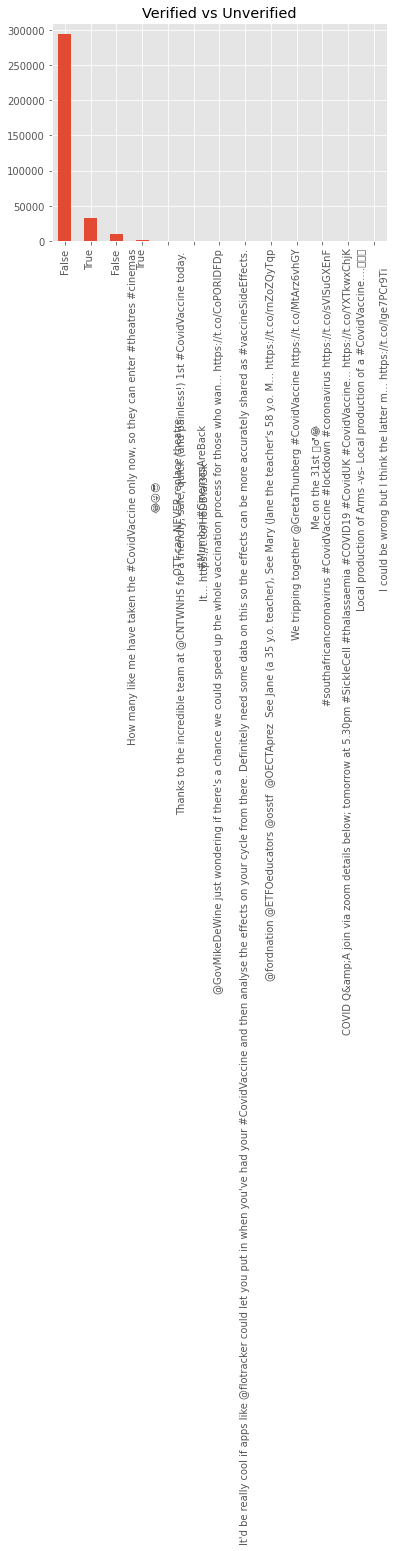

In [5]:
#viz
x=vaxx.user_verified.value_counts().head(20)
x.plot(kind='bar', title="Verified vs Unverified")

In [6]:
vaxx.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
338567,INOVIOLT #SpikeProtein,NaN,Former believer that innovative companies can ...,2020-07-17 15:06:56,2259.0,2304,20998,False,2021-12-03 21:38:44,This is how artificially mortality from covid ...,['CovidVaccine'],Twitter for iPad,False
338568,Independent voter🌺 #freespeech is dead,USA,Rational\nLogical Thinker\n#unity\ntrying to l...,2009-08-31 16:59:46,543.0,839,46712,False,2021-12-03 21:38:01,When ppl are willing to die to maintain their ...,"['CovidVaccine', 'COVID19', 'Italia', 'Italy']",Twitter for Android,False
338569,@OlePops,NaN,"The Man, The Myth, The Legend. Nah... It's jus...",2019-02-18 15:48:27,159.0,709,2469,False,2021-12-03 21:37:39,Italians walking in for their Vaxx.....\n#Covi...,['CovidVaccine'],Twitter Web App,False
338570,Epidemiologist 🇺🇸 and Patriot ❤️,NaN,"Epidemiologist, Educator, and Patriot 🇺🇸 ❤️",2021-01-17 03:49:47,689.0,1101,3316,False,2021-12-03 21:36:40,#Biden ‘ran’ his campaign pledging to 'shut do...,"['Biden', 'CovidVaccine', 'POTUS', 'Trump', 'F...",Twitter for iPhone,False
338571,Socialist Archangel Gabriel,Maryland,I'm a Socialist and Gamer.🖕🏽both parties. I su...,2014-08-15 20:38:55,2300.0,2496,130853,False,2021-12-03 21:35:39,People getting GPS tracking devices Embedded i...,"['CovidVaccine', 'privacy', 'NoVaccinePassport']",Twitter for iPhone,False


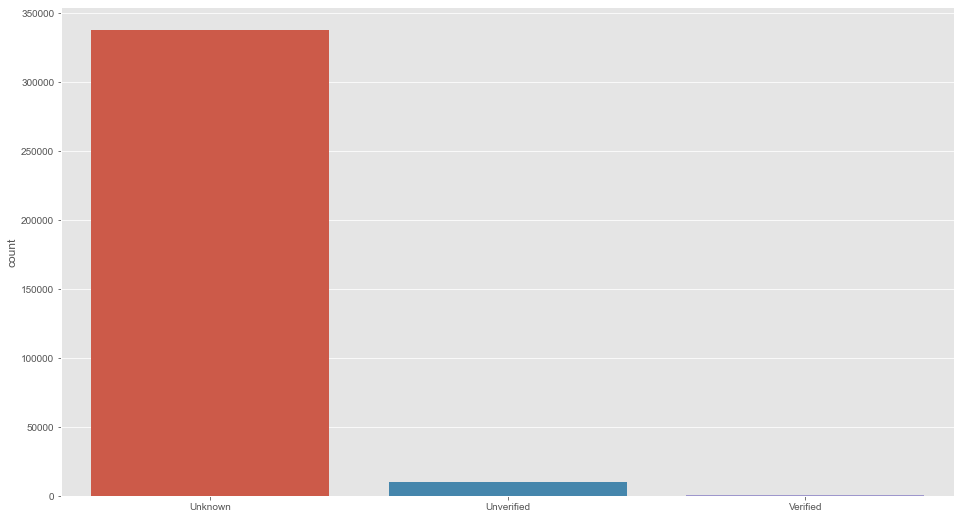

In [7]:
ver=[]
for v in vaxx["user_verified"]:
    if v == False:
        ver.append("Unverified")
    if v == True:
        ver.append("Verified")
    else: 
        ver.append("Unknown")
        
        
_,ax=plt.subplots(figsize=(16,9))
sns.countplot(ver)
plt.xticks()
sns.set_style("ticks")
plt.show()

## Retweets

In [22]:
vaxx.is_retweet.value_counts()

False    338530
Name: is_retweet, dtype: int64

## Followers

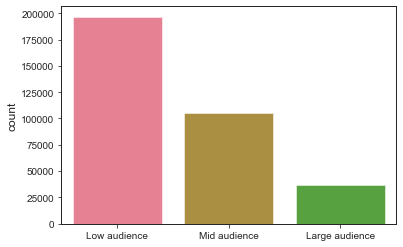

In [29]:
fol=[]
for fl in vaxx.user_followers:
    if fl >10000:
        fol.append("Large audience")
    if fl>1000 and fl<10000:
        fol.append("Mid audience")
    if fl<1000:
        fol.append("Low audience")
        
_,ax=plt.subplots()
sns.set_palette("husl")
ax=sns.countplot(fol)

## Platform

Text(0.5, 1.0, 'Top Ten Platforms')

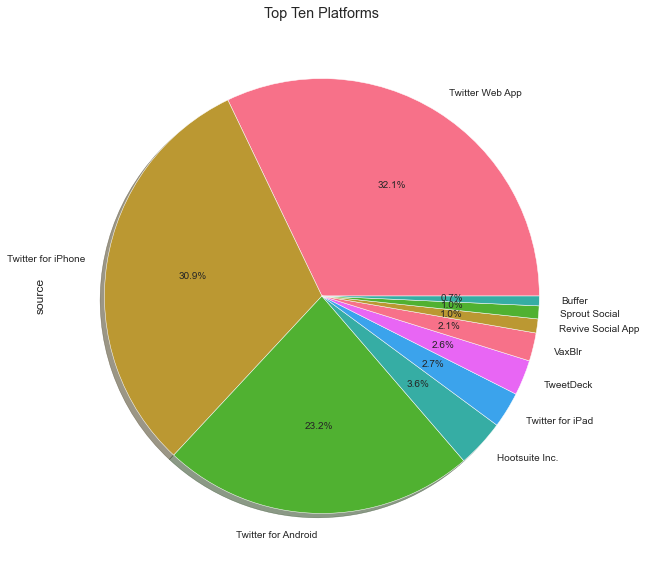

In [32]:
plat=vaxx["source"].value_counts().head(10)
plt.figure(figsize=(10,10))
plat.plot(kind="pie",autopct='%1.1f%%',shadow=True)
plt.title("Top Ten Platforms")

## Time Analysis

This data needs **a lot** of cleaning. Will pose for now but will use it later.
Good news; it's similar to another twitter covid dataset